/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


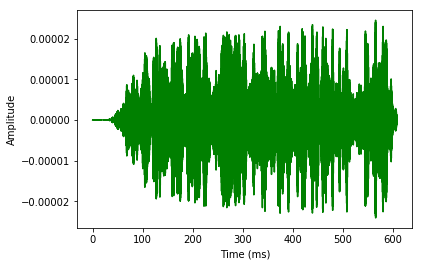

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


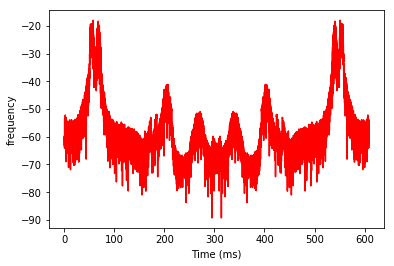

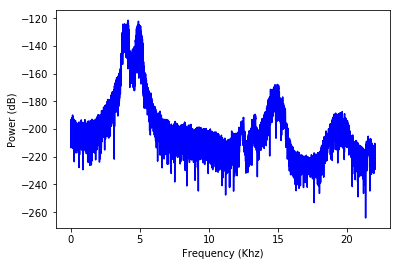

freqArrayLength = 13419
fftArray length = 13419
0.609


In [8]:
import numpy
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft


myAudio = "audio3.wav"

#Read file and get sampling freq [ usually 44100 Hz ]  and sound object
samplingFreq, mySound = wavfile.read(myAudio)


#Check if wave file is 16bit or 32 bit. 24bit is not supported
mySoundDataType = mySound.dtype

#We can convert our sound array to floating point values ranging from -1 to 1 as follows

mySound = mySound / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])
#Get duration of sound file
signalDuration =  round(mySound.shape[0] / samplingFreq , 3)

#If two channels, then select only one channel
mySoundOneChannel = mySound[:,0]

#Plotting the tone

# We can represent sound by plotting the pressure values against time axis.
#Create an array of sample point in one dimension
timeArray = numpy.arange(0, samplePoints, 1)
numpy.savetxt("Timearray.txt", timeArray)
#
timeArray = timeArray / samplingFreq
numpy.savetxt("Timearray2.txt", timeArray)

#Scale to milliSeconds
timeArray = timeArray * 1000
#Plot the tone
plt.plot(timeArray, mySoundOneChannel, color='G')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()


#Plot frequency content
#We can get frquency from amplitude and time using FFT , Fast Fourier Transform algorithm

#Get length of mySound object array
mySoundLength = len(mySound)

#Take the Fourier transformation on given sample point 
#fftArray = fft(mySound)
fftArray_2 = fft(mySoundOneChannel)
numUniquePoints = numpy.ceil((mySoundLength + 1) / 2.0)
numUniquePoints = int(numUniquePoints)
fftArray = fftArray_2[0:numUniquePoints]

#FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
#By taking absolute value , we get only real part

fftArray = abs(fftArray)

#Scale the fft array by length of sample points so that magnitude does not depend on
#the length of the signal or on its sampling frequency

fftArray = fftArray / float(mySoundLength)

#FFT has both positive and negative information. Square to get positive only
fftArray = fftArray **2

#Multiply by two (research why?)
#Odd NFFT excludes Nyquist point
if mySoundLength % 2 > 0: #we've got odd number of points in fft
    fftArray[1:len(fftArray)] = fftArray[1:len(fftArray)] * 2

else: #We've got even number of points in fft
    fftArray[1:len(fftArray) -1] = fftArray[1:len(fftArray) -1] * 2  

freqArray = numpy.arange(0, numUniquePoints, 1.0) * (samplingFreq / mySoundLength);
plt.plot(timeArray, 10 * numpy.log10(fftArray_2), color='R')
plt.xlabel('Time (ms)')
plt.ylabel('frequency')
plt.show()

#Plot the frequency
plt.plot(freqArray/1000, 10 * numpy.log10(fftArray), color='B')
plt.xlabel('Frequency (Khz)')
plt.ylabel('Power (dB)')
plt.show()

#Get List of element in frequency array
#print freqArray.dtype.type
freqArrayLength = len(freqArray)
print ("freqArrayLength =", freqArrayLength)
numpy.savetxt("freqData.csv", freqArray/1000, fmt='%0.2f')

#Print FFtarray information
print ("fftArray length =", len(fftArray))
numpy.savetxt("fftData.csv",fftArray)
mySoundOneChannel = mySoundOneChannel.T
numpy.savetxt("Amptitude.csv", mySoundOneChannel*10000)
print(signalDuration)